In [334]:
import pandas as pd
import numpy as np
%matplotlib inline

In [335]:
#Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
url = "https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/export?format=csv&gid=1724592523"
content = pd.read_csv(url)
#Прочитайте отриману таблицю, використовуючи метод head
content.head()

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [336]:
#Визначте розмір таблиці за допомогою методу shape
print("table shape: ",content.shape)

table shape:  (8704, 25)


In [337]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
content.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [338]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

missing_share = (content.isnull().sum() / len(content)*100).round(2)
missing_share = missing_share.apply(lambda x: f"{x}%")
print(missing_share)

N                                     0.0%
Посада                                0.0%
Мова програмування                  44.23%
Спеціалізація                       82.94%
Загальний досвід роботи               0.0%
Досвід роботи на поточному місці      0.0%
Зарплата на місяць                    0.0%
Зміна зарплати за 12 місяців          0.0%
Місто                                 0.0%
Розмір компанії                       0.0%
Тип компанії                          0.0%
Стать                                 0.0%
Вік                                   0.0%
Освіта                                0.0%
Університет                          4.11%
Ще студент                            0.0%
Рівень англійської                    0.0%
Предметна область                    2.56%
Дата заповнення                       0.0%
User.Agent                            0.0%
exp                                   0.0%
current_job_exp                       0.0%
salary                                0.0%
Валюта     

In [356]:
#Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

#finding index of Мова програмування in original DataFrame
language_col_index = content.columns.get_loc("Мова програмування")
print("original shape of DataFrame: ", content.shape)

#deletion of all columns with missing values
cleared_content = content.dropna(axis=1)
print("shape on condition i would delete all columns with missing values: ", cleared_content.shape)
#inserting "Мова програмування" into cleared from missing values DataFrame using the index in the original DataFrame
cleared_content.insert(language_col_index, "Мова програмування", content["Мова програмування"])
print("shape on condition i deleted all columns with missing values except from 'Мова програмування': ", cleared_content.shape)
cleared_content.head()

original shape of DataFrame:  (8704, 25)
shape on condition i would delete all columns with missing values:  (8704, 19)
shape on condition i deleted all columns with missing values except from 'Мова програмування':  (8704, 20)


,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харків,до 10 осіб,Аутсорсингова,жіноча,20,Неповна Вища,True,Pre-intermediate (нище середнього),12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,Аутсорсингова,жіноча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,чоловіча,26,Вища,False,Intermediate (середній),12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одеса,до 200 осіб,Продуктова,чоловіча,30,Середня,False,Pre-intermediate (нище середнього),12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,чоловіча,30,Технікум / Коледж,False,Intermediate (середній),12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500


In [340]:
#Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, 
#що залишився тільки стовпець "Мова.програмування"
share_missing = np.round(cleared_content.isnull().sum() / len(cleared_content)*100,2)
share_missing = share_missing.apply(lambda x: f"{x}%")
print(share_missing)

N                                     0.0%
Посада                                0.0%
Мова програмування                  44.23%
Загальний досвід роботи               0.0%
Досвід роботи на поточному місці      0.0%
Зарплата на місяць                    0.0%
Зміна зарплати за 12 місяців          0.0%
Місто                                 0.0%
Розмір компанії                       0.0%
Тип компанії                          0.0%
Стать                                 0.0%
Вік                                   0.0%
Освіта                                0.0%
Ще студент                            0.0%
Рівень англійської                    0.0%
Дата заповнення                       0.0%
User.Agent                            0.0%
exp                                   0.0%
current_job_exp                       0.0%
salary                                0.0%
dtype: object


In [341]:
#Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
cleared_content = cleared_content.dropna()

In [342]:
#Визначте новий розмір таблиці за допомогою методу shape
cleared_content.shape

(4854, 20)

In [343]:
#Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
python_data = cleared_content[cleared_content["Мова програмування"] == "Python"].copy()
python_data.head(15)


,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,менше 3 місяців,800,200,Київ,до 50 осіб,Аутсорсингова,чоловіча,26,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.00,0.00,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Київ,до 10 осіб,Стартап,чоловіча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.50,0.50,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Київ,до 10 осіб,Аутсорсингова,чоловіча,19,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.50,0.50,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Київ,до 1000 осіб,Аутсорсингова,чоловіча,21,Неповна Вища,False,Intermediate (середній),12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.50,0.50,685
143,144,Junior Software Engineer,Python,1,1,750,250,Київ,до 10 осіб,Аутсорсингова,чоловіча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.00,1.00,750
153,154,Software Engineer,Python,2,1,1200,0,Дніпро,до 50 осіб,Аутстафінгова,чоловіча,34,Кандидат,False,Advanced (просунутий),12/06/2017 13:20:15,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,2.00,1.00,1200
162,163,Junior Software Engineer,Python,0.5,0.5,500,0,Вінниця,до 200 осіб,Аутсорсингова,чоловіча,20,Технікум / Коледж,True,Pre-intermediate (нище середнього),12/06/2017 13:21:08,Mozilla/5.0 (Linux; Android 7.1.2; LG-D802 Bui...,0.50,0.50,500
171,172,Junior Software Engineer,Python,0.25,0.25,800,0,Київ,до 50 осіб,Продуктова,чоловіча,25,Вища,False,Advanced (просунутий),12/06/2017 13:22:31,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.25,0.25,800
217,218,Software Engineer,Python,8,2,2900,150,Львів,до 1000 осіб,Аутсорсингова,чоловіча,26,Вища,False,Upper-Intermediate (вище середнього),12/06/2017 13:31:50,Mozilla/5.0 (Windows NT 6.2; Win64; x64) Apple...,8.00,2.00,2900
283,284,Junior Software Engineer,Python,1,менше 3 місяців,400,400,Харків,до 10 осіб,Стартап,чоловіча,23,Неповна Вища,False,Intermediate (середній),12/06/2017 13:43:33,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537....,1.00,0.00,400


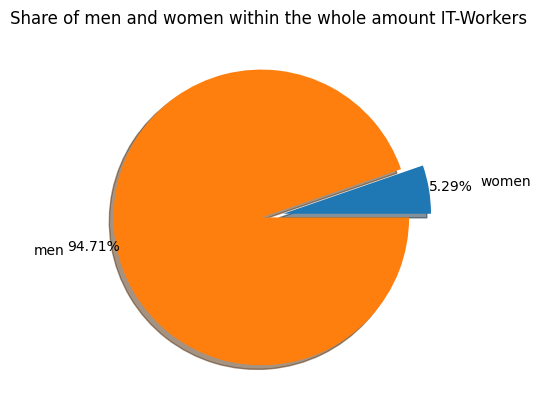

,Стать,quantity
0,жіноча,257
1,чоловіча,4597


In [344]:
#preparational work for building a visualisation
import matplotlib.pyplot as plt

sex = cleared_content.groupby("Стать").agg({"Стать": "count"})
sex.columns=["quantity"]
sex.reset_index(inplace=True)
len(cleared_content)

labels = ["women","men"]
data = sex["quantity"]
explode= [0.1,0.05]

plt.pie(data,
    labels=labels,
    shadow=True,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,)

plt.title("Share of men and women within the whole amount IT-Workers")
plt.show()

sex

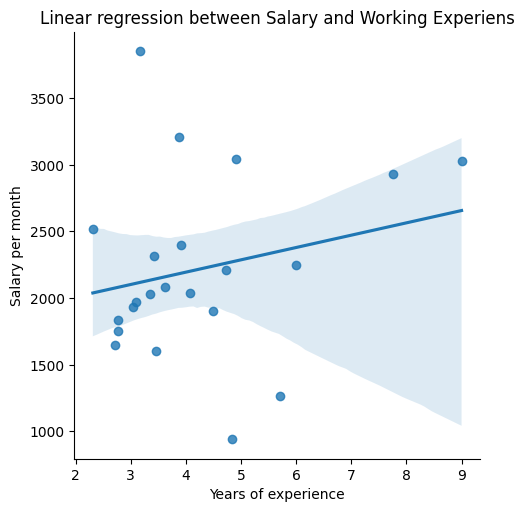

In [345]:
#preparational work for building a visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

language_salary_set = cleared_content.groupby("Мова програмування").agg({"Зарплата на місяць": "mean"})
language_salary_set.reset_index(inplace=True)

cleared_content["Загальний досвід роботи"] = pd.to_numeric(cleared_content["Загальний досвід роботи"], errors="coerce")
language_experience_set = cleared_content.groupby("Мова програмування").agg({"Загальний досвід роботи": "mean"})
language_experience_set.reset_index(inplace=True)

data = pd.merge(language_experience_set,language_salary_set, on="Мова програмування")
sns.lmplot(data=data, x='Загальний досвід роботи', y='Зарплата на місяць')

plt.xlabel("Years of experience")
plt.ylabel("Salary per month")
plt.title("Linear regression between Salary and Working Experiens")
plt.show()

In [346]:
#Визначте розмір таблиці python_data за допомогою методу shape
python_data.shape

(207, 20)

In [347]:
#Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
grouped_content = python_data.groupby("Посада")
grouped_content

In [348]:
#Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", 
#виконайте агрегацію даних за допомогою методу agg 
#і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
new_content = grouped_content.agg({"Зарплата на місяць": ["min","max"]})
new_content.reset_index(inplace=True)
new_content

Посада Зарплата на місяць      
                                           min   max
0  Junior Software Engineer                100  1250
1  Senior Software Engineer               1300  9200
2         Software Engineer                500  5400
3          System Architect               3000  5000
4            Technical Lead               1425  6200

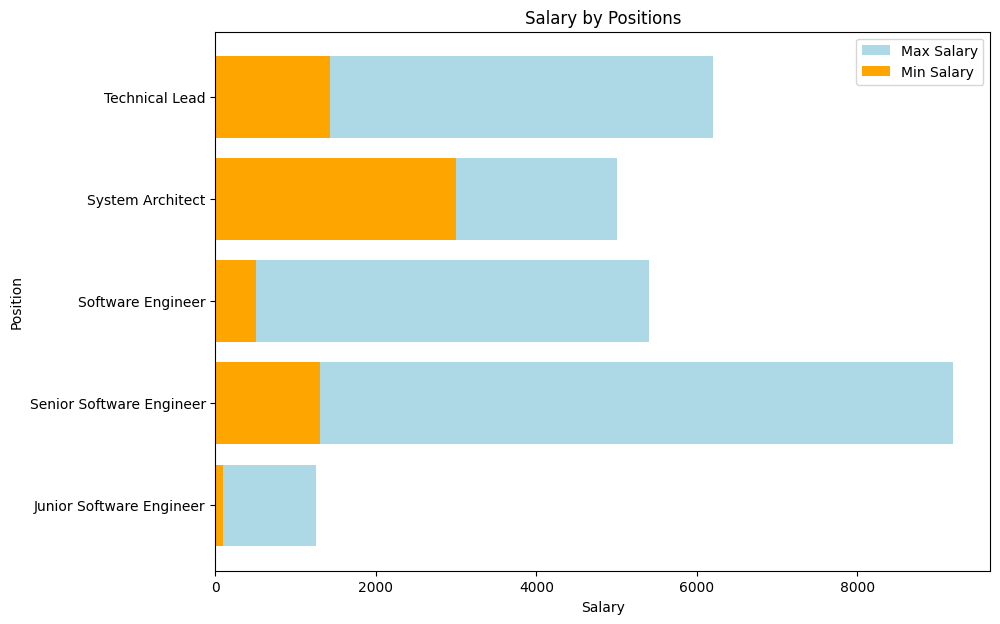

In [349]:
import matplotlib.pyplot as plt

# Accessing the multi-level columns using tuples
max_salary = new_content[('Зарплата на місяць', 'max')]
min_salary = new_content[('Зарплата на місяць', 'min')]

plt.figure(figsize=(10,7))
plt.barh(new_content["Посада"], max_salary, color='lightblue', label="Max Salary")
plt.barh(new_content["Посада"],min_salary, color='orange', label="Min Salary")

plt.xlabel("Salary")
plt.ylabel("Position")
plt.title("Salary by Positions")
plt.legend()

plt.show()


In [350]:
#Ств функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. 
#Використовуйте її для методу apply та створіть новий стовпчик "avg"

#!!! IN THE TASK THERE IS NO INFORMATION WHICH TABLE SHOULD I EXTEND WITH THIS NEW "AVG" COLUMN 
# THAT IS WHY I DECIDED TO ADD IT TO the python_data TABLE

group_mean = python_data.groupby("Посада")["Зарплата на місяць"].mean()

def fill_avg_salary(row):
    return group_mean[row["Посада"]]

# Apply the function to the python_data DataFrame
python_data["avg"] = python_data.apply(fill_avg_salary, axis=1)

python_data.head()


,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,...,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary,avg
12,13,Software Engineer,Python,1,менше 3 місяців,800,200,Київ,до 50 осіб,Аутсорсингова,...,26,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,1799.07000
68,69,Software Engineer,Python,1.5,0.5,900,900,Київ,до 10 осіб,Стартап,...,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,1799.07000
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Київ,до 10 осіб,Аутсорсингова,...,19,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,560.84127
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Київ,до 1000 осіб,Аутсорсингова,...,21,Неповна Вища,False,Intermediate (середній),12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,560.84127
143,144,Junior Software Engineer,Python,1,1,750,250,Київ,до 10 осіб,Аутсорсингова,...,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,560.84127


In [351]:
#Створіть описову статистику за допомогою методу describe для нового стовпчика.
statistics = python_data["avg"].describe()
statistics

count     207.000000
mean     1753.937198
std       996.562606
min       560.841270
25%       560.841270
50%      1799.070000
75%      1799.070000
max      4000.000000
Name: avg, dtype: float64

In [352]:
#Збережіть отриману таблицю в CSV файл
python_data.to_csv("python_data.csv", index=False)

In [353]:
!pip install openpyxl

In [354]:
import openpyxl

In [355]:
python_data.to_excel("python_data.xlsx", sheet_name='python', index= False)